In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, mean_squared_error
import matplotlib.pyplot as plt

In [3]:
true_news_df = pd.read_csv("True.csv")
fake_news_df = pd.read_csv("Fake.csv")

C:\Users\HP\AppData\Local\Temp\ipykernel_10368\2867224814.py:2: DtypeWarning: Columns (4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171) have mixed types. Specify dtype option on import or set low_memory=False.
  fake_news_df = pd.read_csv("Fake.csv")


In [4]:
true_news_df['label'] = 1
fake_news_df['label'] = 0
all_news = pd.concat([true_news_df, fake_news_df], ignore_index=True)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(all_news['text'], all_news['label'], test_size=0.2, random_state=42)

In [6]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [7]:
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
nb_pred = nb_model.predict(X_test_tfidf)


In [8]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_tfidf, y_train)
lr_pred = lr_model.predict(X_test_tfidf)


In [10]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_tfidf, y_train)
svm_pred = svm_model.predict(X_test_tfidf)


In [11]:
# Evaluate models and store results
results = {}

def evaluate_model(y_true, y_pred, model_name):
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    results[model_name] = acc
    print(f"Evaluation metrics for {model_name}:")
    print(f"Accuracy: {acc:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"Root Mean Squared Error: {rmse:.4f}\n")


In [12]:
print("Evaluation Results:")
evaluate_model(y_test, nb_pred, "Naive Bayes")
evaluate_model(y_test, lr_pred, "Logistic Regression")
evaluate_model(y_test, svm_pred, "SVM")

Evaluation Results:
Evaluation metrics for Naive Bayes:
Accuracy: 0.9350
F1 Score: 0.9320
Mean Squared Error: 0.0650
Root Mean Squared Error: 0.2550

Evaluation metrics for Logistic Regression:
Accuracy: 0.9848
F1 Score: 0.9842
Mean Squared Error: 0.0152
Root Mean Squared Error: 0.1235

Evaluation metrics for SVM:
Accuracy: 0.9925
F1 Score: 0.9923
Mean Squared Error: 0.0075
Root Mean Squared Error: 0.0864



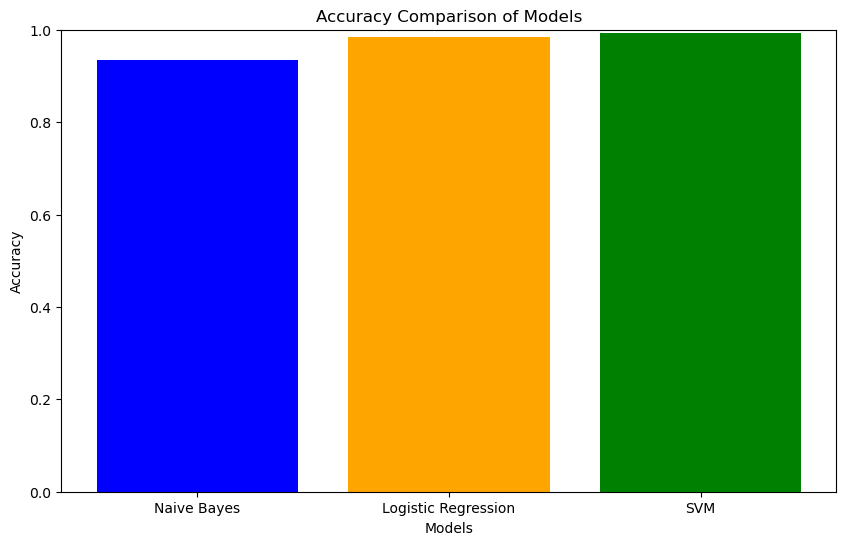

In [13]:
# Plotting
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values(), color=['blue', 'orange', 'green'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Models')
plt.ylim(0, 1)
plt.show()